# KNN no `chb24_com_dwt`

Explorando 20 rodadas de classificação com `KNN` em sua configuração padrão com o dataframe extraído com DWT para encontrar canal com melhor desempenho.

Por fim salvando a tabela com médias, desvios padrão e medianas do desempenho de cada canal.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

seed_array = np.load('./../20_seeds.npy')
print(f'seeds: {seed_array}')

seeds: [4382 8968 8442 1729  290  490 2128 1167 8900 5078 1359  894 7809 6990
 3623 5906 1687 7080 5473 7854]


## 20 rodadas

In [2]:
chb_DF = pd.read_csv('./chb24_com_dwt.csv')
target_S = chb_DF.pop('target')

accuracy_DF = pd.DataFrame()

# agrupa todas colunas pelo mesmo número do canal
colunas_agrupadas_por_numero = []
for i in range(18):
    colunas_agrupadas_por_numero.append(
        [column for column in chb_DF.columns if f'{i}' in column.split('-')]
    )

for numero_da_coluna, colunas in enumerate(colunas_agrupadas_por_numero):
    X, y = chb_DF[colunas].values, target_S.values

    acc = []   

    for seed in seed_array:
        # Distribuindo os dados
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
        
        # Instanciando e treinando classificador
        model = KNeighborsClassifier().fit(X_train, y_train)

        # Adicionando resultados às respectivas listas
        acc.append(model.score(X_test, y_test))

    accuracy_DF[f'{numero_da_coluna}'] = acc

accuracy_DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.843537,0.911565,0.931973,0.952381,0.897959,0.945578,0.993197,0.857143,0.843537,0.891156,0.938776,0.850340,0.782313,0.938776,0.959184,0.904762,0.897959,0.897959
1,0.823129,0.857143,0.891156,0.897959,0.857143,0.918367,0.993197,0.863946,0.816327,0.897959,0.918367,0.870748,0.775510,0.904762,0.938776,0.891156,0.918367,0.836735
2,0.809524,0.857143,0.911565,0.925170,0.850340,0.897959,0.986395,0.823129,0.809524,0.897959,0.884354,0.863946,0.748299,0.918367,0.931973,0.891156,0.904762,0.802721
3,0.816327,0.884354,0.952381,0.952381,0.877551,0.918367,0.986395,0.891156,0.795918,0.891156,0.918367,0.857143,0.721088,0.931973,0.959184,0.911565,0.931973,0.836735
4,0.857143,0.863946,0.938776,0.925170,0.829932,0.938776,0.986395,0.843537,0.809524,0.836735,0.857143,0.816327,0.700680,0.925170,0.952381,0.884354,0.857143,0.809524
5,0.843537,0.938776,0.931973,0.904762,0.870748,0.911565,0.993197,0.904762,0.829932,0.891156,0.911565,0.891156,0.768707,0.945578,0.959184,0.897959,0.925170,0.897959
6,0.823129,0.897959,0.925170,0.897959,0.870748,0.925170,0.972789,0.870748,0.789116,0.891156,0.918367,0.863946,0.741497,0.911565,0.931973,0.877551,0.938776,0.877551
7,0.870748,0.877551,0.918367,0.904762,0.891156,0.918367,1.000000,0.877551,0.843537,0.911565,0.904762,0.836735,0.782313,0.891156,0.897959,0.918367,0.891156,0.823129
8,0.870748,0.897959,0.938776,0.911565,0.857143,0.938776,0.993197,0.884354,0.795918,0.897959,0.918367,0.850340,0.782313,0.918367,0.945578,0.877551,0.904762,0.891156
9,0.843537,0.884354,0.918367,0.897959,0.850340,0.925170,1.000000,0.857143,0.823129,0.897959,0.884354,0.836735,0.768707,0.931973,0.945578,0.829932,0.897959,0.891156


,count,mean,std,min,25%,50%,75%,max
6,20.0,0.990136,0.008102,0.972789,0.986395,0.993197,0.994898,1.000000
14,20.0,0.942177,0.016294,0.897959,0.931973,0.945578,0.952381,0.972789
13,20.0,0.927211,0.014321,0.891156,0.918367,0.931973,0.938776,0.945578
2,20.0,0.926871,0.016935,0.891156,0.918367,0.928571,0.938776,0.959184
5,20.0,0.922109,0.019301,0.884354,0.916667,0.918367,0.928571,0.972789
3,20.0,0.913946,0.017417,0.891156,0.897959,0.911565,0.925170,0.952381
10,20.0,0.905102,0.020994,0.857143,0.889456,0.904762,0.918367,0.938776
16,20.0,0.902041,0.021101,0.857143,0.889456,0.901361,0.918367,0.938776
15,20.0,0.890136,0.023594,0.829932,0.877551,0.887755,0.904762,0.945578
1,20.0,0.886054,0.024664,0.843537,0.869048,0.884354,0.899660,0.938776


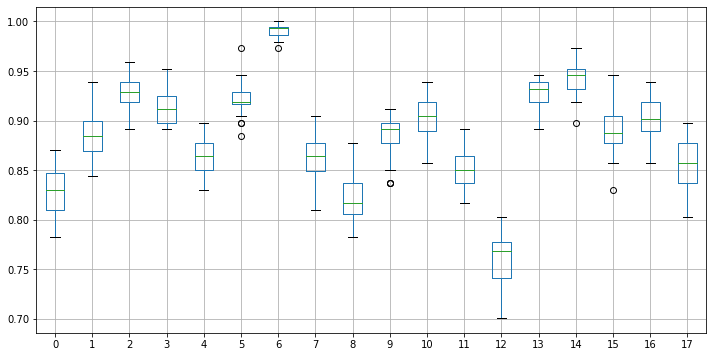

In [3]:
accuracy_DF.boxplot(figsize=(12, 6))
accuracy_DF.describe().transpose().sort_values(by='mean', ascending=False)

## Salvando rank em arquivo csv

In [4]:
save_DF = accuracy_DF.describe().transpose()[['mean', 'std', '50%']]
save_DF['chb'] = '24'
save_DF['channel'] = save_DF.index

save_DF.to_csv(path_or_buf='./knn_descr_channel_rank.csv', index=False)
save_DF

,mean,std,50%,chb,channel
0,0.829932,0.027031,0.829932,24,0
1,0.886054,0.024664,0.884354,24,1
2,0.926871,0.016935,0.928571,24,2
3,0.913946,0.017417,0.911565,24,3
4,0.864626,0.020336,0.863946,24,4
5,0.922109,0.019301,0.918367,24,5
6,0.990136,0.008102,0.993197,24,6
7,0.859524,0.025575,0.863946,24,7
8,0.819048,0.022766,0.816327,24,8
9,0.882993,0.023627,0.891156,24,9
